# Clustering

CREDIT: This notebook was inspired by [this Kaggle notebook](https://www.kaggle.com/code/zeyneloglum/introduction-to-unsupervised-learning-clustering).

## Setup
### Imports

In [1]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement

## K-means clustering

### Preparing the dataset

In order to practice using K-means clustering, we will use the `make_blobs()` method from `scikit-learn`.
Using [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), answer the following questions:
1. Explain in your own words what the purpose of this function is and what it returns.
2. Explain in your own words what its parameters are.
3. Create a dataset containing 200 samples grouped around 3 clusters with a standard deviation of 2.75.
5. Display this dataset. Each cluster should have a different color.
6. The K-means algorithm is sensitive to scaling. In order to use it, it is recommended to normalize data. Normalize the data you have generated and display it again.

**Answers**

1. The make_blobs() function generates a dataset that can be used to try clustering algorithms. The make_blob() function lets you choose the number of samples to create, the number of features, number of clusters. It will then generate observations from a Gaussian distribution around the centers.

2. "n_samples" = number of observations to generate (cf. rows) ; "n_features" = number of features (cf. columns) ; "centers" = number of clusters ; "cluster_std" = standard deviation of the distribution of points around the clusters' centers ; "center_box" = minimum and maximum coordinates for the randomly generated clusters' centers.

In [2]:
#3.

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)
df = pd.DataFrame(X)
df_y = pd.DataFrame(y)

df["class"] = df_y

df.columns = ['feature 1', 'feature 2', "class"]

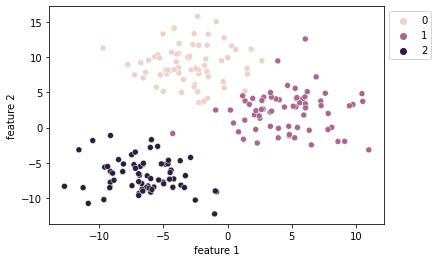

In [3]:
#4.

sns.scatterplot(x='feature 1', y='feature 2', hue='class', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Displays the legend outside the graph
plt.show()

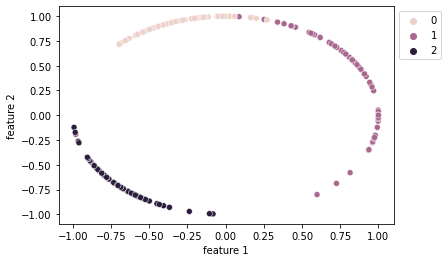

In [4]:
#5.

from sklearn.preprocessing import Normalizer

data_columns = list(df.columns)

normalizer = Normalizer()                                   # create an instance of the scaler
df_nor = df.drop(["class"], axis=1, inplace=False)        # create a copy excluding target
df_nor = normalizer.fit_transform(df_nor)                       # fit the scaler
df_nor = pd.DataFrame(df_nor, columns=data_columns[:-1])    # transform it to dataframe

df_nor["class"] = df_y

sns.scatterplot(x='feature 1', y='feature 2', hue='class', data=df_nor, )
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Displays the legend outside the graph
plt.show()

### Using K-means

Refer to [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) of `sk-learn`'s implementation of K-means and answer the following questions: 
1. Explain in your own words the purpose of the following parameters: `n_clusters`, `max_iter`, `n_init`.
2. Use the K-means algorithm with `K=3` to predict the clusters.
3. Display your data again, this time using the labels predicted by the K-means algorithm. Observe and interpret.

**Answers**

1. "n_clusters" = number of clusters ; "max_iter" = number of iterations (moving the clusters' center to the mean value) during a single run ; "n_init" = number of runs, each with new randomly generated starting clusters' centers.

In [5]:
#2.

X_nor = df_nor.drop(["class"], axis=1)
X_nor_num = X_nor.to_numpy()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, max_iter = 100, random_state=42).fit(X_nor_num)

y_pred = kmeans.predict(X_nor_num)

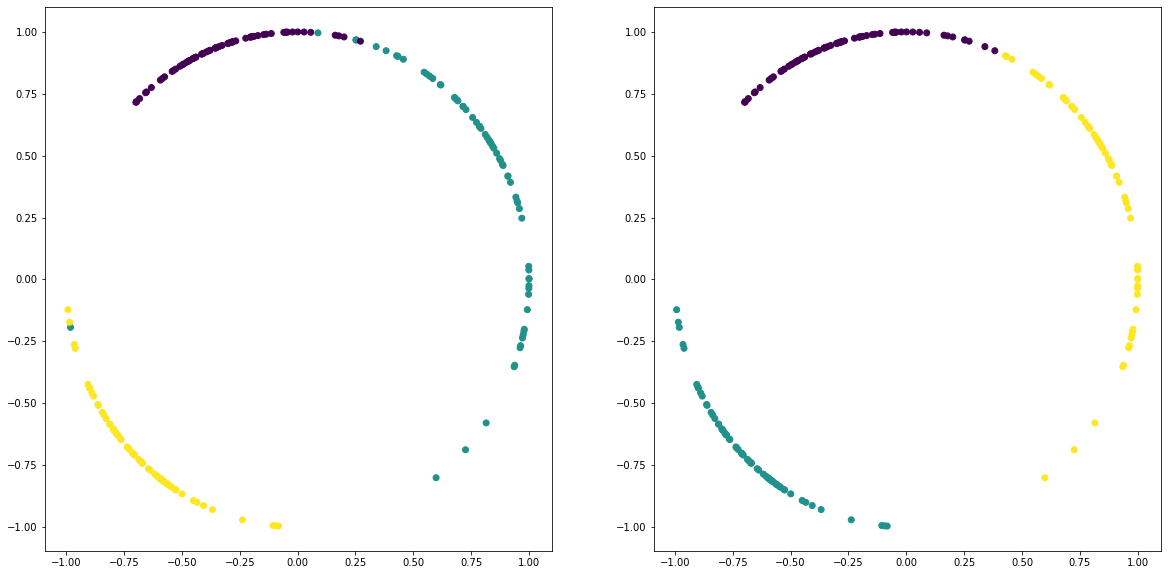

In [6]:
#3.

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(X_nor_num[:,0], X_nor_num[:,1], c = y)

plt.subplot(122)
plt.scatter(X_nor_num[:,0], X_nor_num[:,1], c = y_pred)

3. Except for the points from different classes sharing the same areas (0 < x < 0.25 for example), the KMeans algorithm predicts the right class for the vast majority of the points

### Inertia and elbow method

1. What is inertia? How can you get that information in your code? 
2. What is the inertia of the clusters you obtained with `K=3`?
3. Run the algorithm for K varying between 2 and 10 and record the inertia value.
4. Explain in your own words what the elbow method is.
5. Using the elbow method, find the optimal value for K. Comment on your findings.

**Answers**

1. Inertia is the sum of squared distance of samples to their closest cluster center. This variable is stored in the KNMeans model and can be accessed with "*KNMeans_model*.inertia()".

In [7]:
#2.

KMeans_3 = KMeans(n_clusters=3, n_init=10, random_state=42)
KMeans_3.fit(X_nor_num)
print(KMeans_3.inertia_) # inertia for K=3

#3.

list_inertia=[]
list_k= range(2,11)
for k in range(2,11):
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_nor_num)
    list_inertia.append(model.inertia_)

23.869034631295328


4. The elbow method aims to find the K value that is the best compromise between low inertia and a low number of clusters by visualising the following function : inertia = f(K). This optimal value of K corresponds to a bump (an elbow) in the chart after which the inertia does not drop significantly.

<function matplotlib.pyplot.show(close=None, block=None)>

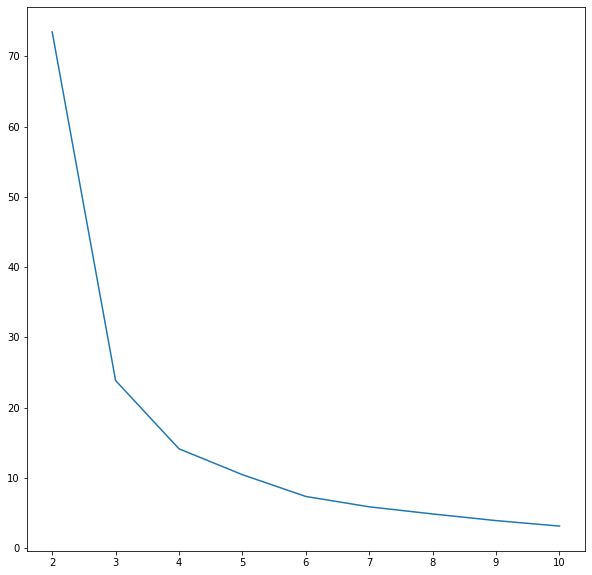

In [8]:
#5. 

plt.figure(figsize=(10,10))
plt.plot(list_k, list_inertia)
plt.show

5. The optimal value for K is 3 according to the elbow method, matching the number of clusters generated with make_blobs. The clustering algorithm worked well and identified the correct number of clusters with no previous knowledge about it.